# OneClass SVM



## 0.환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from tqdm import tqdm
from itertools import product

# 모델링을 위해 필요한 함수를 불러 옵니다.
from sklearn.svm import OneClassSVM # <-- One Class SVM!
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

* 모델 시각화 함수 만들기

In [2]:
def model_visualize(model, v1, v2, title = "") :
    # 메쉬그리드값 저장하기
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

    # 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
    Z = Z.reshape(xx.shape)
    # 시각화
    plt.figure(figsize = (8,8))
    plt.title(title)

    # 메쉬그리드 값의 Anomaly Score에 대한 등고선
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    # 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
    sns.scatterplot(x = v1, y = v2, sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

    plt.axis("tight")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

## 1.One Class SVM 개념이해

> sklearn help : https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html  
One Class SVM Paper('Support Vector Method for Novelty Detection') : https://proceedings.neurips.cc/paper/1999/file/8725fb777f25776ffa9076e44fcfd776-Paper.pdf

### (1) 샘플데이터 가져오기

In [3]:
# Single Blob
X1 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X.csv')

# Double Blob
X2 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X2.csv')

### (2) Single Blob

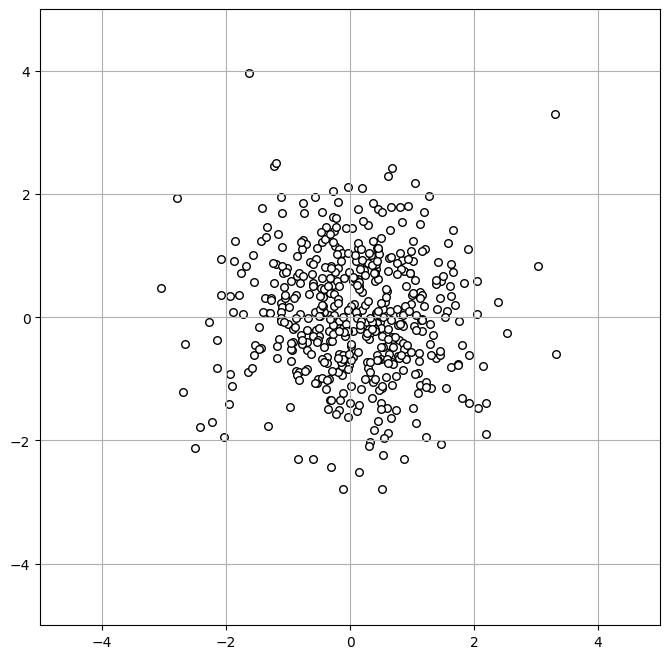

In [ ]:
# sample data
plt.figure(figsize = (8,8))

plt.scatter(X1['v1'], X1['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* One Class SVM 모델을 일단 만들어 봅시다.

In [ ]:
# 모델링
model = OneClassSVM()
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

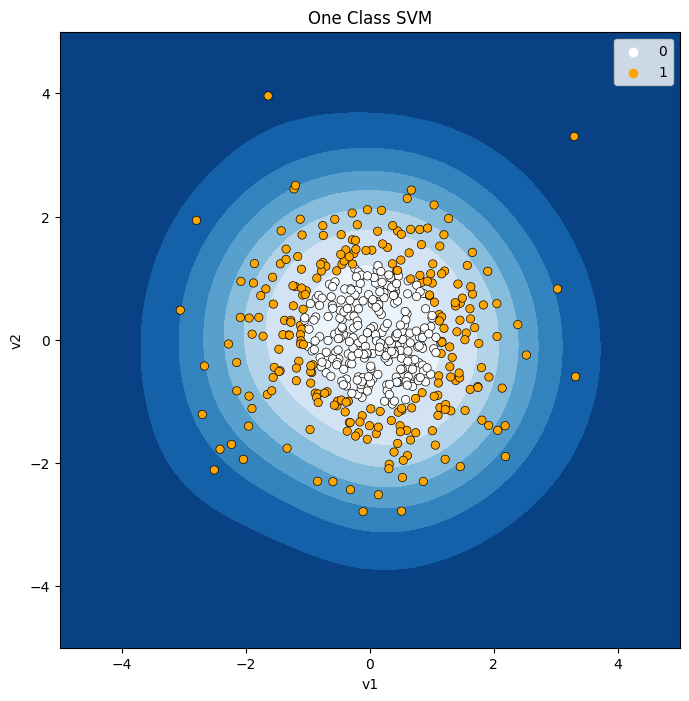

In [ ]:
model_visualize(model, X1['v1'], X1['v2'], 'One Class SVM')

* 몇가지를 조절해 봅시다.
    * nu
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * gamma
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

In [ ]:
# 리스트 값의 조합을 쉽게 만들어 주는 함수
from itertools import product
nu = [0.05, 0.3, 0.6]
gamma = [0.1]
items = [nu, gamma]
params = list(product(*items))
params

[(0.05, 0.1), (0.3, 0.1), (0.6, 0.1)]

nu = 0.05, gamma = 0.1


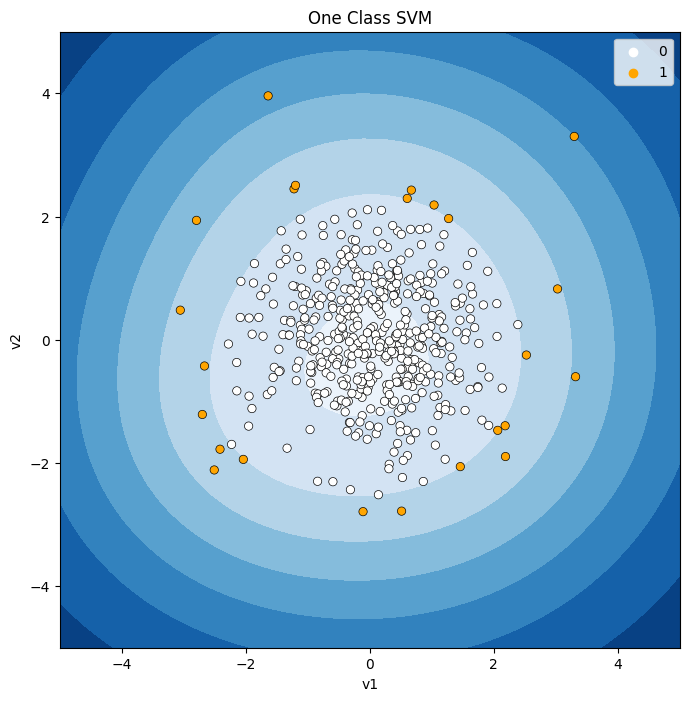

nu = 0.3, gamma = 0.1


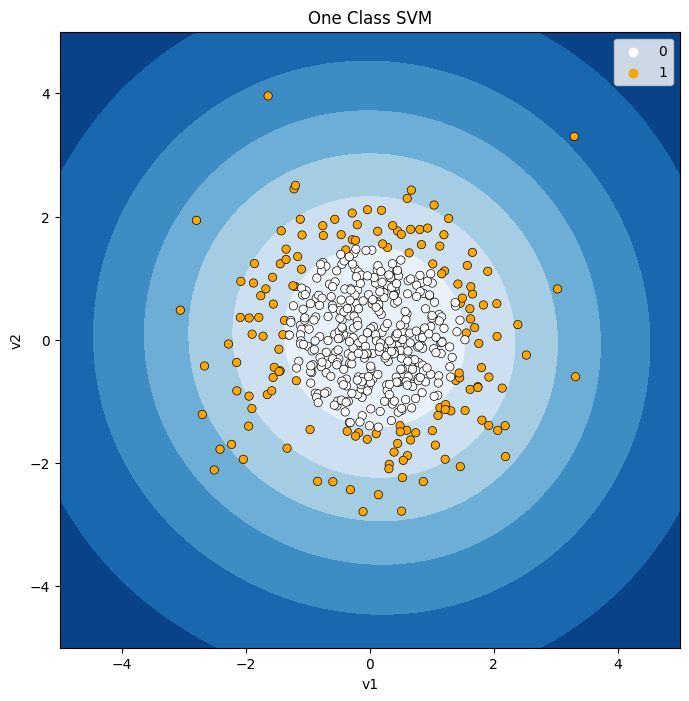

nu = 0.6, gamma = 0.1


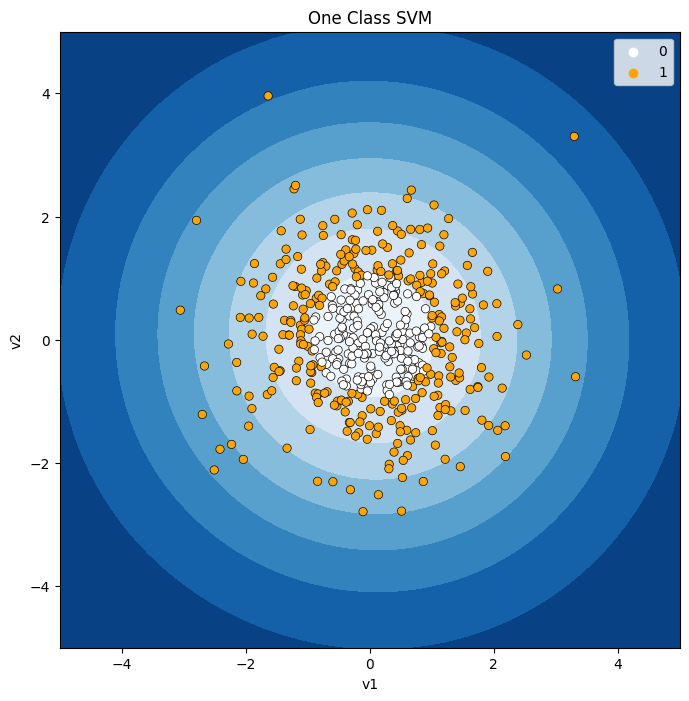

In [ ]:
# 반복문으로 값의 조합에 대해 모델을 시각화 해 봅시다.
for p in params :
    # 모델링
    model = OneClassSVM(nu = p[0], gamma = p[1])
    model.fit(X1)
    pred = model.predict(X1)
    pred = np.where(pred == 1, 0, 1)
    print(f'nu = {p[0]}, gamma = {p[1]}')
    model_visualize(model, X1['v1'], X1['v2'], 'One Class SVM')

### (3) Double Blob

In [ ]:
plt.figure(figsize = (8,8))

plt.scatter(X2['v1'], X2['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* One Class SVM 모델을 일단 만들어 봅시다.

In [ ]:
# 모델링
model = OneClassSVM()
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [ ]:
model_visualize(model, X2['v1'], X2['v2'], 'One Class SVM')

* 몇가지를 조절해 봅시다.
    * nu
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * gamma
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

In [ ]:
# 리스트 값의 조합을 쉽게 만들어 주는 함수
from itertools import product
nu = [0.01, 0.05, 0.1, 0.11, 0.15, 0.2, 0.3]
gamma = [0.2]
items = [nu, gamma]
params = list(product(*items))
params

In [ ]:
# 반복문으로 값의 조합에 대해 모델을 시각화 해 봅시다.
for p in params :
    # 모델링
    model = OneClassSVM(nu = p[0], gamma = p[1])
    model.fit(X2)
    pred = model.predict(X2)
    pred = np.where(pred == 1, 0, 1)

    print(f'nu = {p[0]}, gamma = {p[1]}')
    model_visualize(model, X2['v1'], X2['v2'], 'One Class SVM')

## 3.Semiconductor manufacturing process dataset


![](https://assets.pandaily.com/uploads/2021/10/semiconductor.png)

* 반도체 제조 공정은 시점별로 수많은 센서로부터 정보를 수집하여 공정을 감시합니다.
* 센서정보와 함께 공정간 발생된 불량품에 대한 정보를 저장하였습니다.
* 불량을 예측해 봅시다.

### (1) 데이터 준비

#### 1) 데이터 로딩

In [4]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)
data.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v528,v571,v572,v573,v574,v575,v576,v577,v578,label
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


변수 정보
* label : 1 - 불량, 0 - 정상
* v### : 센서값들


In [5]:
target = 'label'

In [6]:
data[target].value_counts(normalize = True)

0    0.933631
1    0.066369
Name: label, dtype: float64

#### 2) 데이터 분할
* x, y로 나누기

In [7]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [8]:
# train_val에서 train : val = 7 : 3
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state = 20)

In [9]:
print(x_train.shape, x_val.shape)

(1096, 52) (471, 52)


#### **3) 스케일링(Optional)**
* 스케일링을 필요로 하는 알고리즘이 있습니다.
* SVM은 스케일링을 필요로 합니다.

In [10]:
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

#### **4) Normal 데이터 추출**
* Normal 데이터만 학습용으로 사용!

In [11]:
x_train0 = x_train_s[y_train == 0]

### (2) 모델링

#### 1) 기본값으로 모델링

In [12]:
model = OneClassSVM()
model.fit(x_train0) # x_train 중에서도 normal 데이터만 학습에 사용!
pred = model.predict(x_val_s)
pred = np.where(pred == 1, 0, 1) # -1, 1 ==> 1, 0

print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

[[201 244]
 [ 14  12]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       445
           1       0.05      0.46      0.09        26

    accuracy                           0.45       471
   macro avg       0.49      0.46      0.35       471
weighted avg       0.89      0.45      0.58       471



#### 2) nu 값을 조절하면서 f1 score를 비교해 봅시다.

* nu : 0.01 ~ 0.4

In [13]:
params = np.linspace(0.01,0.4,100)
f1 = []

for nu in tqdm(params) :
    model = OneClassSVM(nu = nu)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

100%|██████████| 100/100 [00:04<00:00, 24.63it/s]


In [14]:
nu_f1_max = params[np.argmax(f1)]
nu_f1_max

0.12424242424242424

nu : 0.12424242424242424, f1_max : 0.16279069767441862


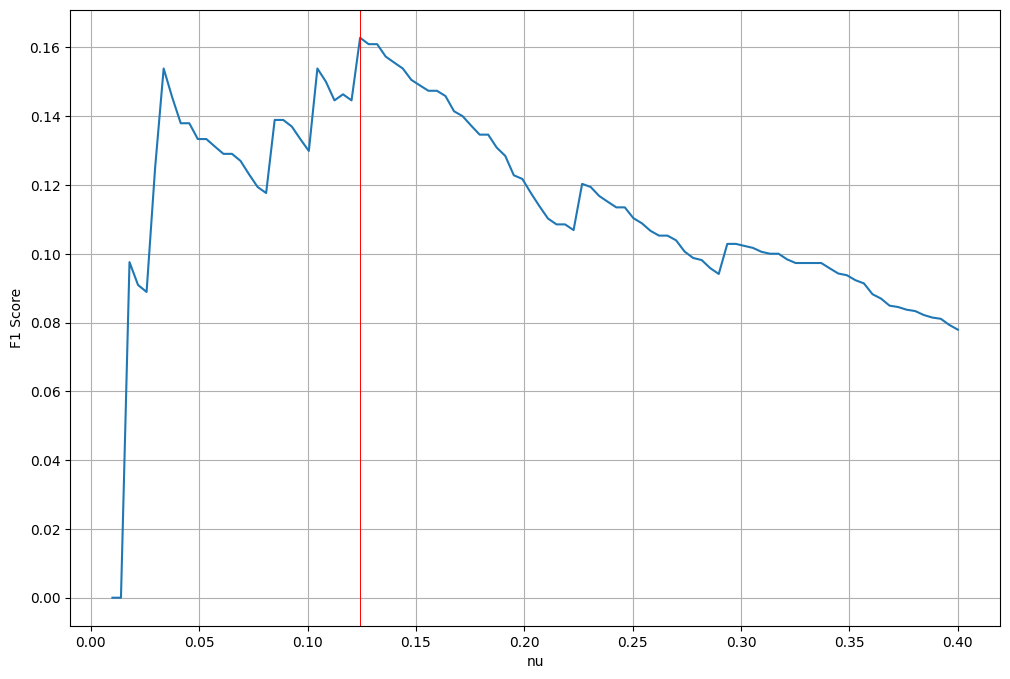

In [15]:
print( f'nu : {nu_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(nu_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('nu')
plt.grid()
plt.show()

#### 3) gamma값을 조절하면서 f1 score를 비교해 봅시다.
* gamma : 0.001 ~ 0.4

In [16]:
params = np.linspace(0.001, 0.4, 200)
f1 = []

for g in tqdm(params) :
    model = OneClassSVM(nu=0.124, gamma = g)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

100%|██████████| 200/200 [00:06<00:00, 32.90it/s]


In [17]:
ga_f1_max = params[np.argmax(f1)]
ga_f1_max

0.07518592964824121

gamma : 0.07518592964824121, f1_max : 0.16867469879518074


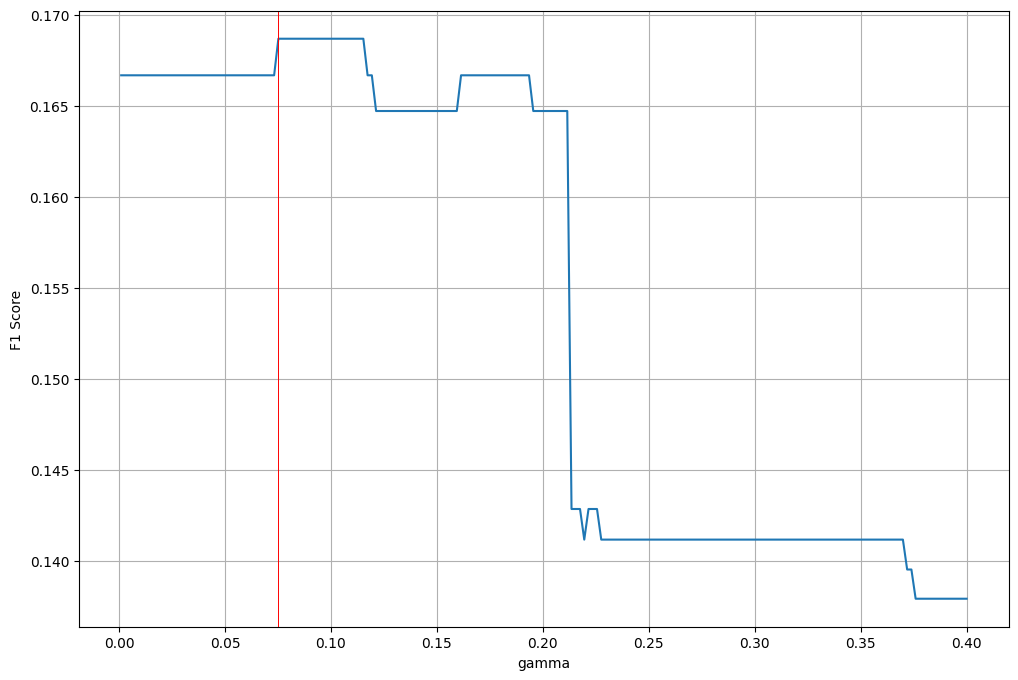

In [18]:
print( f'gamma : {ga_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(ga_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('gamma')
plt.grid()
plt.show()

#### 4) 수동 Grid Search

In [ ]:
# product 함수를 이용하여 값의 조합을 구성
nu = np.linspace(0.1, 0.2, 40)
gamma = np.linspace(0.01, 0.2, 40)
iter = list(product(nu, gamma))
iter

* 튜닝

In [ ]:
# 결과 저장 빈 리스트
f1_list = []

for i in tqdm(iter) :

    model = OneClassSVM(nu = i[0], gamma = i[1])
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1_list.append(f1_score(y_val, pred, pos_label=1))

# 최종 결과
result = pd.DataFrame({'nu, gamma':iter, 'f1':f1_list})
result

In [21]:
result.loc[result['f1'] == result['f1'].max()]

,"nu, gamma",f1
160,"(0.11025641025641027, 0.01)",0.175
161,"(0.11025641025641027, 0.014871794871794873)",0.175
162,"(0.11025641025641027, 0.019743589743589744)",0.175
163,"(0.11025641025641027, 0.024615384615384615)",0.175
164,"(0.11025641025641027, 0.029487179487179487)",0.175
165,"(0.11025641025641027, 0.03435897435897436)",0.175
200,"(0.11282051282051282, 0.01)",0.175
201,"(0.11282051282051282, 0.014871794871794873)",0.175
202,"(0.11282051282051282, 0.019743589743589744)",0.175
